In [1]:
import numpy as np
from ExampleBoundaries import TruncatedSphereRAD
from AcousticProperties import *
from RayleighCavitySolverRAD import *

import matplotlib.pyplot as plt
%matplotlib inline

f = 10.0 # Hertz
k = frequencyToWavenumber(f)

solver = RayleighCavitySolverRAD(*(TruncatedSphereRAD()))

nBoundaryElements = solver.numberOfElements() - solver.nOpenElements
boundaryCondition = BoundaryCondition(nBoundaryElements)

for i in range(nBoundaryElements):
    boundaryCondition.alpha[i] =  0.0
    boundaryCondition.beta[i]  =  1.0
    boundaryCondition.f[i]     = -1.0
        
exteriorPoints = np.array([[0.000, 0.100],
                           [0.000, 0.300],
                           [0.000, 0.500],
                           [0.000, 0.700],
                           [0.000, 0.900]], dtype=np.float32)

interiorPoints = np.array([[0.000, -0.900],
                           [0.000, -0.700],
                           [0.000, -0.500],
                           [0.000, -0.300],
                           [0.000, -0.100]], dtype=np.float32)

solution = solver.solveBoundary(k, boundaryCondition)

print(solution)

interiorPhi = solver.solveInterior(solution, interiorPoints)
print("Sound pressure at the interior points\n")
print(interiorPhi)

exteriorPhi = solver.solveExterior(solution, exteriorPoints)
print("Sound pressure at the exterior points\n")
print(exteriorPhi)

Density of medium:      1.205 kg/m^3
Speed of sound:         344.0 m/s
Wavenumber (Frequency): 0.18265073567382517 (10.0 Hz)

index          Potential                   Pressure                    Velocity              Intensity

    1  -1.9001e+00+ -2.0318e-01i    1.5383e+01+ -1.4386e+02i    1.5680e+00+  2.9613e-03i     1.1847e+01
    2  -1.8757e+00+ -2.0307e-01i    1.5375e+01+ -1.4202e+02i    1.5199e+00+  3.0768e-03i     1.1466e+01
    3  -1.8418e+00+ -2.0285e-01i    1.5358e+01+ -1.3945e+02i    1.5965e+00+  3.3232e-03i     1.2028e+01
    4  -1.7928e+00+ -2.0250e-01i    1.5332e+01+ -1.3574e+02i    1.7596e+00+  3.7238e-03i     1.3236e+01
    5  -1.7153e+00+ -2.0200e-01i    1.5294e+01+ -1.2987e+02i    3.1437e+00+  6.7831e-03i     2.3599e+01
    6  -1.9902e+00+ -2.0245e-01i    1.5328e+01+ -1.5068e+02i   -1.0000e+00+  0.0000e+00i    -7.6638e+00
    7  -2.3400e+00+ -2.0317e-01i    1.5382e+01+ -1.7717e+02i   -1.0000e+00+  0.0000e+00i    -7.6912e+00
    8  -2.5917e+00+ -2.0369e-01i    1.5422

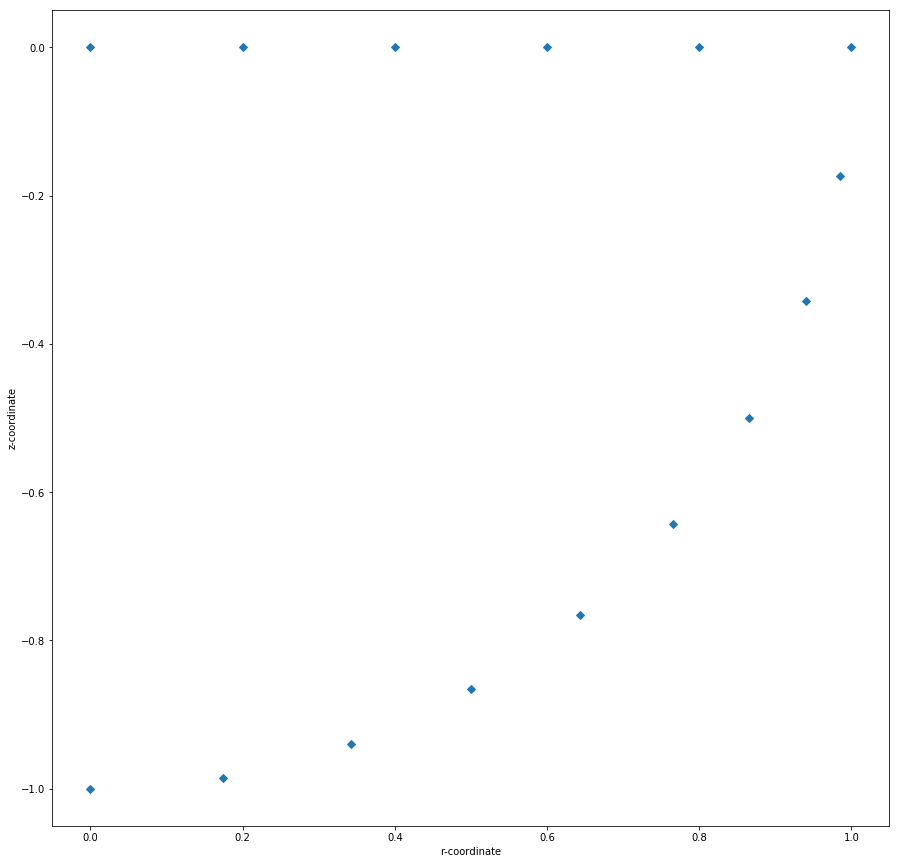

In [4]:
vertices, elements, openElements = TruncatedSphereRAD()
plt.rcParams['figure.figsize'] = [15, 15]
bem, = plt.plot(vertices[:,0], vertices[:,1], 'D', label='verts')
plt.xlabel('r-coordinate')
plt.ylabel('z-coordinate')
plt.show()
